# Statistical Design and Analysis of Experiments 

This notebook provides a comprehensive guide to the statistical design and analysis of experiments. It includes functions to calculate critical values, p-values, and confidence intervals for both F-distribution and t-distribution. Additionally, it demonstrates how to format and interpret the results of these statistical tests through various examples.


## Calculate F-distribution critical values, p-values and confidence intervals

F-Distribution Analysis Results:
--------------------------------
Test Type: two-sided

Parameters:
  - Numerator df (df1): 9
  - Denominator df (df2): 9
  - Alpha: 0.01
  - Confidence Level: 99.0%

Critical Values:
  - Upper: 6.5411
  - Lower: 0.1529

P-value: 0.0618
F-statistic: 3.7540

Confidence Interval:
  (0.5739, 24.5553)


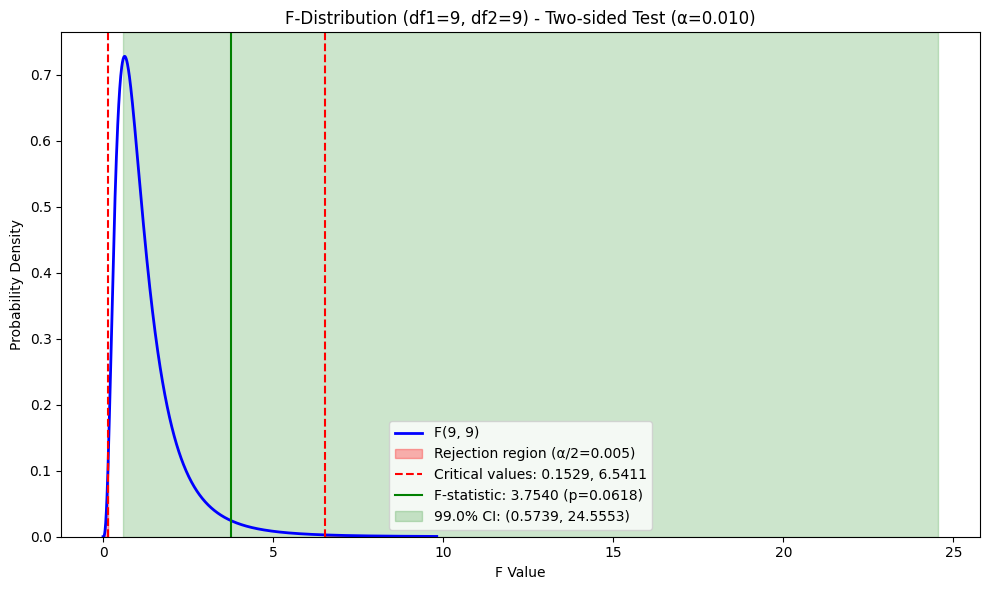

F-Distribution Analysis Results:
--------------------------------
Test Type: two-sided

Parameters:
  - Numerator df (df1): 9
  - Denominator df (df2): 9
  - Alpha: 0.025
  - Confidence Level: 97.5%

Critical Values:
  - Upper: 5.0043
  - Lower: 0.1998

P-value: 0.0618
F-statistic: 3.7540

Confidence Interval:
  (0.7502, 18.7861)


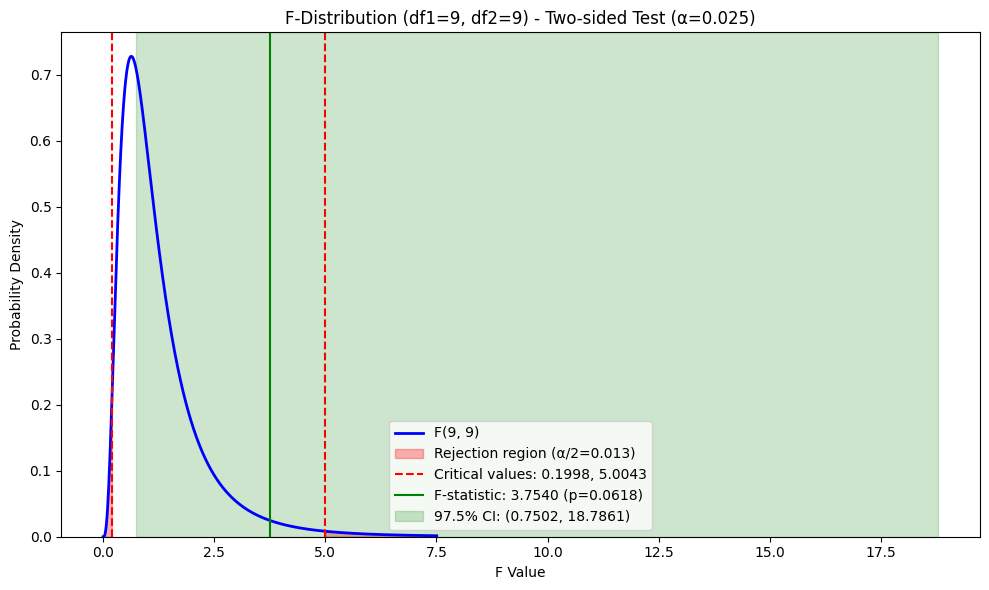

F-Distribution Analysis Results:
--------------------------------
Test Type: two-sided

Parameters:
  - Numerator df (df1): 9
  - Denominator df (df2): 9
  - Alpha: 0.05
  - Confidence Level: 95.0%

Critical Values:
  - Upper: 4.0260
  - Lower: 0.2484

P-value: 0.0618
F-statistic: 3.7540

Confidence Interval:
  (0.9324, 15.1136)


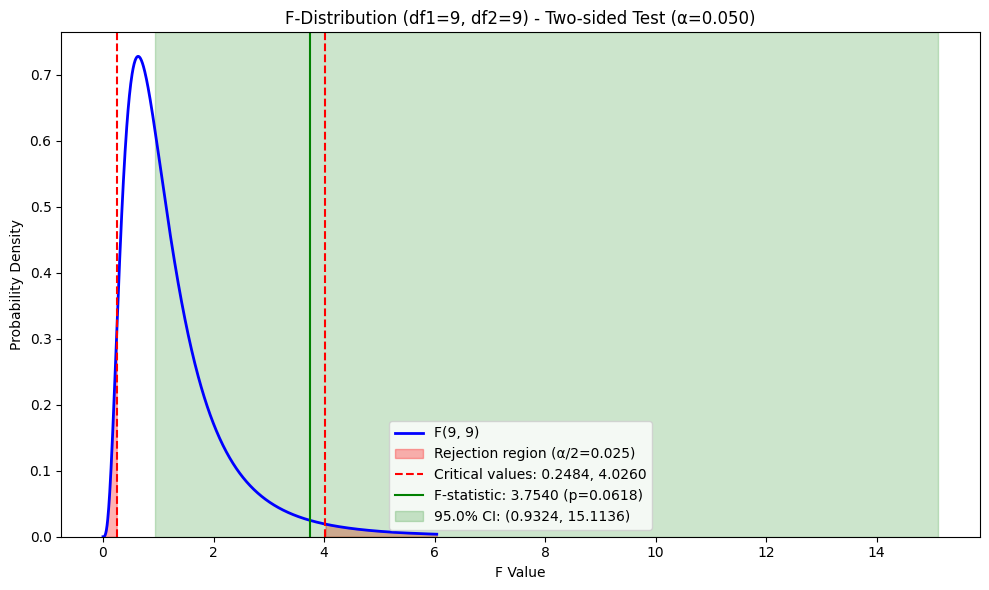

F-Distribution Analysis Results:
--------------------------------
Test Type: two-sided

Parameters:
  - Numerator df (df1): 9
  - Denominator df (df2): 9
  - Alpha: 0.1
  - Confidence Level: 90.0%

Critical Values:
  - Upper: 3.1789
  - Lower: 0.3146

P-value: 0.0618
F-statistic: 3.7540

Confidence Interval:
  (1.1809, 11.9336)


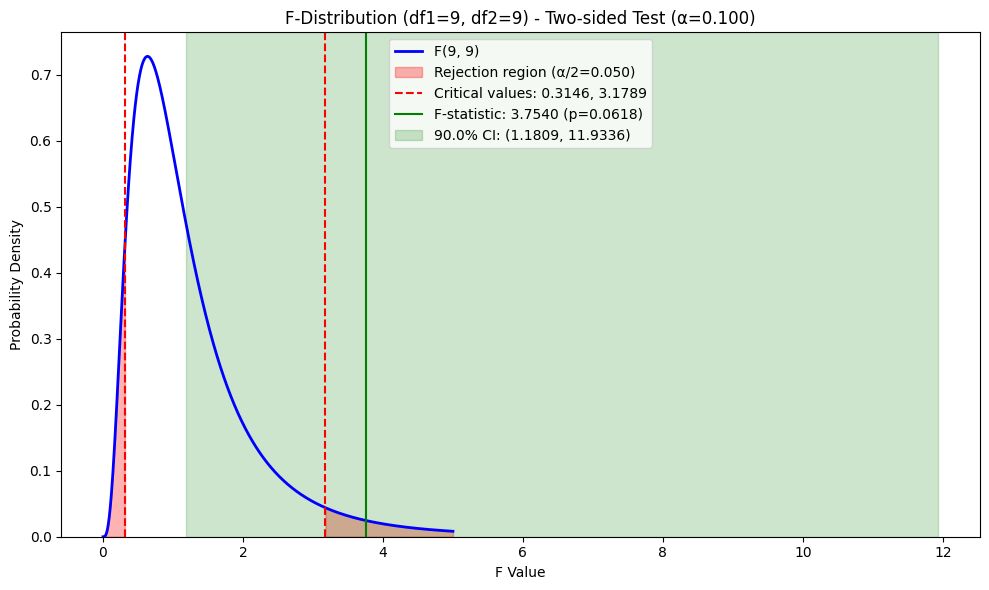

F-Distribution Analysis Results:
--------------------------------
Test Type: two-sided

Parameters:
  - Numerator df (df1): 9
  - Denominator df (df2): 9
  - Alpha: 0.2
  - Confidence Level: 80.0%

Critical Values:
  - Upper: 2.4403
  - Lower: 0.4098

P-value: 0.0618
F-statistic: 3.7540

Confidence Interval:
  (1.5383, 9.1610)


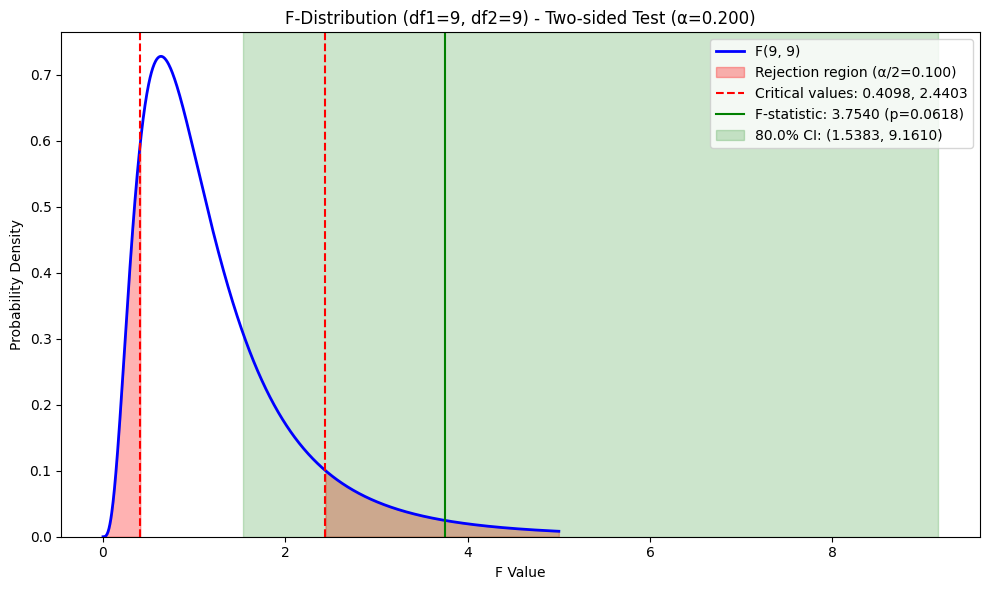

In [12]:
import scipy.stats as stats
from typing import Tuple, Optional, Literal, Union
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

def calculate_f_distribution(df1: int, 
                           df2: int, 
                           alpha: float = 0.05,
                           alternative: Literal['two-sided', 'greater', 'less'] = 'two-sided',
                           f_stat: Optional[float] = None) -> dict:
    """
    Calculate F-distribution critical values, p-values and confidence intervals.
    
    Parameters:
    -----------
    df1 : int
        Degrees of freedom for the numerator (first group)
    df2 : int
        Degrees of freedom for the denominator (second group)
    alpha : float, optional
        Significance level (default is 0.05 for 95% confidence)
    alternative : str, optional
        Type of test: 'two-sided' (default), 'greater', or 'less'
    f_stat : float, optional
        F-statistic value for p-value and confidence interval calculation
        
    Returns:
    --------
    dict
        Dictionary containing:
        - 'critical_values': Critical value(s) for the F-distribution
        - 'p_value': P-value if f_stat is provided
        - 'confidence_interval': Tuple of (lower, upper) bounds if f_stat is provided
        - 'parameters': Dictionary of input parameters
        
    Examples:
    --------
    >>> # Two-sided test
    >>> results = calculate_f_distribution(7, 9, alpha=0.05, alternative='two-sided')
    
    >>> # One-sided test (greater)
    >>> results = calculate_f_distribution(7, 9, alpha=0.05, alternative='greater', f_stat=3.0625)
    """
    # Validate inputs
    if not (isinstance(df1, int) and isinstance(df2, int)):
        raise TypeError("Degrees of freedom must be integers")
    if not (df1 > 0 and df2 > 0):
        raise ValueError("Degrees of freedom must be positive")
    if not (0 < alpha < 1):
        raise ValueError("Alpha must be between 0 and 1")
    if alternative not in ['two-sided', 'greater', 'less']:
        raise ValueError("Alternative must be 'two-sided', 'greater', or 'less'")
    
    # Calculate critical values based on alternative hypothesis
    critical_values = {}
    if alternative == 'two-sided':
        critical_values['upper'] = stats.f.ppf(1 - alpha/2, df1, df2)
        critical_values['lower'] = stats.f.ppf(alpha/2, df1, df2)
    elif alternative == 'greater':
        critical_values['upper'] = stats.f.ppf(1 - alpha, df1, df2)
    else:  # less
        critical_values['lower'] = stats.f.ppf(alpha, df1, df2)
    
    # Prepare results dictionary
    results = {
        'critical_values': critical_values,
        'parameters': {
            'df1': df1,
            'df2': df2,
            'alpha': alpha,
            'alternative': alternative,
            'confidence_level': (1 - alpha) * 100
        }
    }
    
    # Calculate p-value and confidence interval if F-statistic is provided
    if f_stat is not None:
        if not isinstance(f_stat, (int, float)):
            raise TypeError("F-statistic must be a number")
        if f_stat <= 0:
            raise ValueError("F-statistic must be positive")
        
        # Store F-statistic for visualization
        results['f_stat'] = f_stat
        
        # Calculate p-value based on alternative hypothesis
        if alternative == 'two-sided':
            p_value = 2 * min(
                1 - stats.f.cdf(f_stat, df1, df2),
                stats.f.cdf(f_stat, df1, df2)
            )
        elif alternative == 'greater':
            p_value = 1 - stats.f.cdf(f_stat, df1, df2)
        else:  # less
            p_value = stats.f.cdf(f_stat, df1, df2)
            
        results['p_value'] = p_value
        
        # Calculate confidence interval
        if alternative == 'two-sided':
            # Corrected calculation for confidence intervals
            ci_lower = f_stat / critical_values['upper']
            ci_upper = f_stat / critical_values['lower']
        elif alternative == 'greater':
            ci_lower = f_stat / critical_values['upper']
            ci_upper = float('inf')
        else:  # less
            ci_lower = 0
            ci_upper = f_stat / critical_values['lower']
            
        results['confidence_interval'] = (ci_lower, ci_upper)
    
    return results

def format_f_results(results: dict, decimals: int = 4) -> str:
    """
    Format the results from calculate_f_distribution into a readable string.
    
    Parameters:
    -----------
    results : dict
        Output dictionary from calculate_f_distribution
    decimals : int, optional
        Number of decimal places to round to (default is 4)
        
    Returns:
    --------
    str
        Formatted string with the results
    """
    output = []
    params = results['parameters']
    
    output.append("F-Distribution Analysis Results:")
    output.append("--------------------------------")
    output.append(f"Test Type: {params['alternative']}")
    output.append("\nParameters:")
    output.append(f"  - Numerator df (df1): {params['df1']}")
    output.append(f"  - Denominator df (df2): {params['df2']}")
    output.append(f"  - Alpha: {params['alpha']}")
    output.append(f"  - Confidence Level: {params['confidence_level']}%")
    
    output.append("\nCritical Values:")
    if 'upper' in results['critical_values']:
        output.append(f"  - Upper: {results['critical_values']['upper']:.{decimals}f}")
    if 'lower' in results['critical_values']:
        output.append(f"  - Lower: {results['critical_values']['lower']:.{decimals}f}")
    
    if 'p_value' in results:
        output.append(f"\nP-value: {results['p_value']:.{decimals}f}")
        output.append(f"F-statistic: {results['f_stat']:.{decimals}f}")
    
    if 'confidence_interval' in results:
        ci = results['confidence_interval']
        output.append("\nConfidence Interval:")
        if ci[0] == 0:
            lower = "0"
        else:
            lower = f"{ci[0]:.{decimals}f}"
        if ci[1] == float('inf'):
            upper = "∞"
        else:
            upper = f"{ci[1]:.{decimals}f}"
        output.append(f"  ({lower}, {upper})")
    
    return "\n".join(output)

def visualize_f_distribution(results: dict, show_plot: bool = True, figure_size: Tuple[int, int] = (10, 6)) -> Optional[Figure]:
    """
    Visualize the F-distribution analysis results.
    
    Parameters:
    -----------
    results : dict
        Output dictionary from calculate_f_distribution
    show_plot : bool, optional
        Whether to display the plot (default is True)
    figure_size : tuple, optional
        Size of the figure (width, height) in inches (default is (10, 6))
        
    Returns:
    --------
    matplotlib.figure.Figure or None
        Figure object if show_plot is False, None otherwise
    """
    # Extract parameters from results
    params = results['parameters']
    df1 = params['df1']
    df2 = params['df2']
    alpha = params['alpha']
    alternative = params['alternative']
    critical_values = results['critical_values']
    f_stat = results.get('f_stat')
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figure_size)
    
    # Calculate appropriate x-range for the F-distribution
    if alternative == 'two-sided':
        x_max = max(critical_values.get('upper', 0) * 1.5, f_stat * 1.2 if f_stat else 0)
    elif alternative == 'greater':
        x_max = max(critical_values.get('upper', 0) * 1.5, f_stat * 1.2 if f_stat else 0)
    else:  # less
        x_max = max(critical_values.get('lower', 0) * 3, f_stat * 1.2 if f_stat else 0)
    
    x_max = max(x_max, 5)  # Ensure a reasonable x-range
    x = np.linspace(0.001, x_max, 1000)
    
    # Plot the F-distribution PDF
    y = stats.f.pdf(x, df1, df2)
    ax.plot(x, y, 'b-', lw=2, label=f'F({df1}, {df2})')
    
    # Shade rejection regions based on alternative hypothesis
    if alternative == 'two-sided':
        # Lower tail
        x_lower = np.linspace(0.001, critical_values['lower'], 100)
        y_lower = stats.f.pdf(x_lower, df1, df2)
        ax.fill_between(x_lower, y_lower, alpha=0.3, color='r', label=f'Rejection region (α/2={alpha/2:.3f})')
        
        # Upper tail
        x_upper = np.linspace(critical_values['upper'], x_max, 100)
        y_upper = stats.f.pdf(x_upper, df1, df2)
        ax.fill_between(x_upper, y_upper, alpha=0.3, color='r')
        
        # Add vertical lines for critical values
        ax.axvline(critical_values['lower'], color='r', linestyle='--', 
                  label=f'Critical values: {critical_values["lower"]:.4f}, {critical_values["upper"]:.4f}')
        ax.axvline(critical_values['upper'], color='r', linestyle='--')
        
    elif alternative == 'greater':
        # Upper tail only
        x_upper = np.linspace(critical_values['upper'], x_max, 100)
        y_upper = stats.f.pdf(x_upper, df1, df2)
        ax.fill_between(x_upper, y_upper, alpha=0.3, color='r', 
                       label=f'Rejection region (α={alpha:.3f})')
        
        # Add vertical line for critical value
        ax.axvline(critical_values['upper'], color='r', linestyle='--', 
                  label=f'Critical value: {critical_values["upper"]:.4f}')
        
    else:  # less
        # Lower tail only
        x_lower = np.linspace(0.001, critical_values['lower'], 100)
        y_lower = stats.f.pdf(x_lower, df1, df2)
        ax.fill_between(x_lower, y_lower, alpha=0.3, color='r', 
                       label=f'Rejection region (α={alpha:.3f})')
        
        # Add vertical line for critical value
        ax.axvline(critical_values['lower'], color='r', linestyle='--', 
                  label=f'Critical value: {critical_values["lower"]:.4f}')
    
    # Add F-statistic if provided
    if f_stat is not None:
        ax.axvline(f_stat, color='g', linestyle='-', linewidth=1.5,
                  label=f'F-statistic: {f_stat:.4f} (p={results["p_value"]:.4f})')
        
        # Highlight confidence interval if provided
        if 'confidence_interval' in results:
            ci = results['confidence_interval']
            if ci[0] > 0 and ci[1] < float('inf'):
                ax.axvspan(ci[0], ci[1], alpha=0.2, color='g', 
                          label=f'{params["confidence_level"]}% CI: ({ci[0]:.4f}, {ci[1]:.4f})')
            elif ci[0] > 0:
                ax.axvspan(ci[0], x_max, alpha=0.2, color='g',
                          label=f'{params["confidence_level"]}% CI: ({ci[0]:.4f}, ∞)')
            elif ci[1] < float('inf'):
                ax.axvspan(0, ci[1], alpha=0.2, color='g',
                          label=f'{params["confidence_level"]}% CI: (0, {ci[1]:.4f})')
    
    # Add title and labels
    title = f'F-Distribution (df1={df1}, df2={df2})'
    if alternative == 'two-sided':
        title += f' - Two-sided Test (α={alpha:.3f})'
    elif alternative == 'greater':
        title += f' - Right-tailed Test (α={alpha:.3f})'
    else:  # less
        title += f' - Left-tailed Test (α={alpha:.3f})'
        
    ax.set_title(title)
    ax.set_xlabel('F Value')
    ax.set_ylabel('Probability Density')
    
    # Add legend
    ax.legend(loc='best')
    
    # Set y-axis to start at 0
    ax.set_ylim(bottom=0)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    if show_plot:
        plt.show()
        return None
    else:
        return fig

def analyze_f_distribution(df1: int, 
                         df2: int, 
                         alpha: float = 0.05,
                         alternative: Literal['two-sided', 'greater', 'less'] = 'two-sided',
                         f_stat: Optional[float] = None,
                         visualize: bool = True,
                         figure_size: Tuple[int, int] = (10, 6)) -> Tuple[dict, Optional[Figure]]:
    """
    Analyze F-distribution with calculations and optional visualization.
    
    Parameters:
    -----------
    df1 : int
        Degrees of freedom for the numerator (first group)
    df2 : int
        Degrees of freedom for the denominator (second group)
    alpha : float, optional
        Significance level (default is 0.05 for 95% confidence)
    alternative : str, optional
        Type of test: 'two-sided' (default), 'greater', or 'less'
    f_stat : float, optional
        F-statistic value for p-value and confidence interval calculation
    visualize : bool, optional
        Whether to create a visualization (default is True)
    figure_size : tuple, optional
        Size of the figure (width, height) in inches (default is (10, 6))
        
    Returns:
    --------
    tuple
        (results_dict, figure) where:
        - results_dict: Output dictionary from calculate_f_distribution
        - figure: matplotlib Figure object or None if visualize is False
        
    Examples:
    --------
    >>> # Analyze with visualization
    >>> results, fig = analyze_f_distribution(7, 9, alpha=0.05, f_stat=3.0625)
    >>> print(format_f_results(results))
    >>> plt.figure(fig.number)
    >>> plt.show()
    >>> 
    >>> # Analyze without visualization
    >>> results, _ = analyze_f_distribution(7, 9, visualize=False)
    """
    # Calculate F-distribution results
    results = calculate_f_distribution(df1, df2, alpha, alternative, f_stat)
    
    # Create visualization if requested
    fig = None
    if visualize:
        fig = visualize_f_distribution(results, show_plot=False, figure_size=figure_size)
    
    return results, fig


# # Example usage
# if __name__ == "__main__":
#     import matplotlib.pyplot as plt
    
#     # Example 1: Two-sided test
#     print("Example 1: Two-sided F-test")
#     results1, fig1 = analyze_f_distribution(7, 9, alpha=0.05, alternative='two-sided', f_stat=2.5)
#     print(format_f_results(results1))
#     plt.figure(fig1.number)
#     plt.show()
    
#     # Example 2: One-sided test (greater) with F-statistic
#     print("\nExample 2: Right-tailed F-test")
#     results2, fig2 = analyze_f_distribution(7, 9, alpha=0.05, alternative='greater', f_stat=3.0625)
#     print("\n" + format_f_results(results2))
#     plt.figure(fig2.number)
#     plt.show()
    
#     # Example 3: One-sided test (less) with F-statistic
#     print("\nExample 3: Left-tailed F-test")
#     results3, fig3 = analyze_f_distribution(7, 9, alpha=0.05, alternative='less', f_stat=0.5)
#     print("\n" + format_f_results(results3))
#     plt.figure(fig3.number)
#     plt.show()

results1, fig1 = analyze_f_distribution(9, 9, alpha=0.01, alternative='two-sided', f_stat=3.754)
print(format_f_results(results1))
plt.figure(fig1.number)
plt.show()

results2, fig2 = analyze_f_distribution(9, 9, alpha=0.025, alternative='two-sided', f_stat=3.754)
print(format_f_results(results2))
plt.figure(fig2.number)
plt.show()

results3, fig3 = analyze_f_distribution(9, 9, alpha=0.05, alternative='two-sided', f_stat=3.754)
print(format_f_results(results3))
plt.figure(fig3.number)
plt.show()

results4, fig4 = analyze_f_distribution(9, 9, alpha=0.1, alternative='two-sided', f_stat=3.754)
print(format_f_results(results4))
plt.figure(fig4.number)
plt.show()

results5, fig5 = analyze_f_distribution(9, 9, alpha=0.2, alternative='two-sided', f_stat=3.754)
print(format_f_results(results5))
plt.figure(fig5.number)
plt.show()




## Calculate t-distribution critical values and related statistics

In [4]:
import scipy.stats as stats
from typing import Literal, Dict, Optional, Tuple

def calculate_t_critical(df: int,
                        alpha: float = 0.05,
                        alternative: Literal['two-sided', 'less', 'greater'] = 'two-sided',
                        t_stat: Optional[float] = None) -> Dict:
    """
    Calculate t-distribution critical values and related statistics.
    
    Parameters:
    -----------
    df : int
        Degrees of freedom
    alpha : float, optional
        Significance level (default is 0.05)
    alternative : str, optional
        Type of test: 'two-sided', 'less', or 'greater' (default is 'two-sided')
    t_stat : float, optional
        t-statistic value for p-value calculation
        
    Returns:
    --------
    dict
        Dictionary containing:
        - 'critical_values': Critical value(s) for the t-distribution
        - 'p_value': P-value if t_stat is provided
        - 'parameters': Dictionary of input parameters
        
    Examples:
    --------
    >>> # Left-tailed test with α = 0.01 and df = 16
    >>> results = calculate_t_critical(df=16, alpha=0.01, alternative='less')
    >>> print(results['critical_values']['lower'])
    
    >>> # Two-sided test with t-statistic
    >>> results = calculate_t_critical(df=16, alpha=0.05, 
    ...                               alternative='two-sided', t_stat=-2.5)
    >>> print(results['p_value'])
    """
    # Input validation
    if not isinstance(df, int) or df <= 0:
        raise ValueError("Degrees of freedom must be a positive integer")
    if not 0 < alpha < 1:
        raise ValueError("Alpha must be between 0 and 1")
    if alternative not in ['two-sided', 'less', 'greater']:
        raise ValueError("Alternative must be 'two-sided', 'less', or 'greater'")
    
    # Calculate critical values based on alternative hypothesis
    critical_values = {}
    
    if alternative == 'two-sided':
        critical_values['upper'] = stats.t.ppf(1 - alpha/2, df)
        critical_values['lower'] = -critical_values['upper']
    elif alternative == 'less':
        critical_values['lower'] = -stats.t.ppf(1 - alpha, df)
    else:  # greater
        critical_values['upper'] = stats.t.ppf(1 - alpha, df)
    
    # Prepare results dictionary
    results = {
        'critical_values': critical_values,
        'parameters': {
            'df': df,
            'alpha': alpha,
            'alternative': alternative,
            'confidence_level': (1 - alpha) * 100
        }
    }
    
    # Calculate p-value if t-statistic is provided
    if t_stat is not None:
        if alternative == 'two-sided':
            p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
        elif alternative == 'less':
            p_value = stats.t.cdf(t_stat, df)
        else:  # greater
            p_value = 1 - stats.t.cdf(t_stat, df)
        
        results['p_value'] = p_value
    
    return results

def format_t_results(results: Dict, decimals: int = 3) -> str:
    """
    Format the results from calculate_t_critical into a readable string.
    
    Parameters:
    -----------
    results : dict
        Output dictionary from calculate_t_critical
    decimals : int, optional
        Number of decimal places to round to (default is 3)
        
    Returns:
    --------
    str
        Formatted string with the results
    """
    output = []
    params = results['parameters']
    
    output.append("T-Distribution Analysis Results:")
    output.append("-------------------------------")
    output.append(f"Test Type: {params['alternative']}")
    output.append(f"Degrees of Freedom: {params['df']}")
    output.append(f"Alpha: {params['alpha']}")
    output.append(f"Confidence Level: {params['confidence_level']}%")
    
    output.append("\nCritical Values:")
    if 'upper' in results['critical_values']:
        output.append(f"  Upper: {results['critical_values']['upper']:.{decimals}f}")
    if 'lower' in results['critical_values']:
        output.append(f"  Lower: {results['critical_values']['lower']:.{decimals}f}")
    
    if 'p_value' in results:
        output.append(f"\nP-value: {results['p_value']:.{decimals}f}")
    
    return "\n".join(output)

Example

In [13]:

# Example usage for the chicken breeds problem

# Case from the question: left-tailed test with α = 0.01 and df = 16
# results = calculate_t_critical(
#     df=14,
#     alpha=0.01,
#     alternative='less'
# )
# print(format_t_results(results))
# print("\n" + "="*50 + "\n")

# Example with t-statistic
results_with_stat = calculate_t_critical(
    df=18,
    alpha=0.025,
    alternative='two-sided',
    t_stat=-2.674
)
print(format_t_results(results_with_stat))

T-Distribution Analysis Results:
-------------------------------
Test Type: two-sided
Degrees of Freedom: 18
Alpha: 0.025
Confidence Level: 97.5%

Critical Values:
  Upper: 2.445
  Lower: -2.445

P-value: 0.015


## Calculate Chi-squared critical values and related statistics

In [6]:
import scipy.stats as stats
from typing import Literal, Dict, Optional, Tuple

def calculate_chi_squared_critical(df: int,
                                 chi_stat: Optional[float] = None,
                                 alpha: float = 0.05,
                                 alternative: Literal['two-sided', 'greater', 'less'] = 'two-sided') -> Dict:
    """
    Calculate chi-squared distribution critical values and related statistics.
    
    Parameters:
    -----------
    df : int
        Degrees of freedom
    chi_stat : float, optional
        Pre-calculated chi-squared statistic for p-value calculation
    alpha : float, optional
        Significance level (default is 0.05)
    alternative : str, optional
        Type of test: 'two-sided', 'greater', or 'less' (default is 'two-sided')
        
    Returns:
    --------
    dict
        Dictionary containing:
        - 'critical_values': Critical value(s) for the chi-squared distribution
        - 'p_value': P-value if chi_stat is provided
        - 'parameters': Dictionary of input parameters
        
    Examples:
    --------
    >>> # Variance test with pre-calculated chi-squared statistic
    >>> results = calculate_chi_squared_critical(df=19, chi_stat=38.0, alternative='greater')
    >>> print(results['p_value'])
    
    >>> # Two-sided test for df=15
    >>> results = calculate_chi_squared_critical(df=15, alpha=0.05, alternative='two-sided')
    >>> print(results['critical_values'])
    """
    # Input validation
    if not isinstance(df, int) or df <= 0:
        raise ValueError("Degrees of freedom must be a positive integer")
    if not 0 < alpha < 1:
        raise ValueError("Alpha must be between 0 and 1")
    if alternative not in ['two-sided', 'greater', 'less']:
        raise ValueError("Alternative must be 'two-sided', 'greater', or 'less'")
    
    # Calculate critical values based on alternative hypothesis
    critical_values = {}
    
    if alternative == 'two-sided':
        critical_values['upper'] = stats.chi2.ppf(1 - alpha/2, df)
        critical_values['lower'] = stats.chi2.ppf(alpha/2, df)
    elif alternative == 'greater':
        critical_values['upper'] = stats.chi2.ppf(1 - alpha, df)
    else:  # less
        critical_values['lower'] = stats.chi2.ppf(alpha, df)
    
    # Prepare results dictionary
    results = {
        'critical_values': critical_values,
        'parameters': {
            'df': df,
            'alpha': alpha,
            'alternative': alternative,
            'confidence_level': (1 - alpha) * 100
        }
    }
    
    # Calculate p-value if chi-squared statistic is provided
    if chi_stat is not None:
        if alternative == 'two-sided':
            p_value = 2 * min(
                stats.chi2.cdf(chi_stat, df),
                1 - stats.chi2.cdf(chi_stat, df)
            )
        elif alternative == 'greater':
            p_value = 1 - stats.chi2.cdf(chi_stat, df)
        else:  # less
            p_value = stats.chi2.cdf(chi_stat, df)
        
        results['p_value'] = p_value
    
    return results

def format_chi_squared_critical_results(results: Dict, decimals: int = 4) -> str:
    """
    Format the results from calculate_chi_squared_critical into a readable string.
    
    Parameters:
    -----------
    results : dict
        Output dictionary from calculate_chi_squared_critical
    decimals : int, optional
        Number of decimal places to round to (default is 4)
        
    Returns:
    --------
    str
        Formatted string with the results
    """
    output = []
    params = results['parameters']
    
    output.append("Chi-Squared Distribution Analysis Results:")
    output.append("----------------------------------------")
    output.append(f"Test Type: {params['alternative']}")
    output.append(f"Degrees of Freedom: {params['df']}")
    output.append(f"Alpha: {params['alpha']}")
    output.append(f"Confidence Level: {params['confidence_level']}%")
    
    output.append("\nCritical Values:")
    if 'upper' in results['critical_values']:
        output.append(f"  Upper: {results['critical_values']['upper']:.{decimals}f}")
    if 'lower' in results['critical_values']:
        output.append(f"  Lower: {results['critical_values']['lower']:.{decimals}f}")
    
    if 'p_value' in results:
        output.append(f"\nP-value: {results['p_value']:.{decimals}f}")
        
        # Add interpretation
        output.append("\nTest Interpretation:")
        if results['p_value'] < params['alpha']:
            output.append("  Reject the null hypothesis")
        else:
            output.append("  Fail to reject the null hypothesis")
    
    return "\n".join(output)


Example

In [7]:

# Example usage:
# For your example with n=20, S²=0.04, σ²=0.02
n = 20
S2 = 0.04
sigma2_theoretical = 0.02

# Calculate chi-squared statistic
chi_stat = (n-1) * S2 / sigma2_theoretical
print(f"Chi-squared statistic: {chi_stat:.4f}")
# Test if variance is greater than theoretical
results = calculate_chi_squared_critical(
    df=n-1,
    chi_stat=chi_stat,
    alpha=0.05,
    alternative='greater'
)

print(format_chi_squared_critical_results(results))

Chi-squared statistic: 38.0000
Chi-Squared Distribution Analysis Results:
----------------------------------------
Test Type: greater
Degrees of Freedom: 19
Alpha: 0.05
Confidence Level: 95.0%

Critical Values:
  Upper: 30.1435

P-value: 0.0059

Test Interpretation:
  Reject the null hypothesis


## Calculate Z-distribution critical values and related statistics

In [8]:
import scipy.stats as stats
from typing import Literal, Dict, Optional, Tuple

def calculate_z_critical(mu_0: float,
                        x_bar: float,
                        sigma: float,
                        n: int,
                        alpha: float = 0.05,
                        alternative: Literal['two-sided', 'greater', 'less'] = 'two-sided') -> Dict:
    """
    Calculate z-distribution statistics for hypothesis testing with known variance.
    
    Parameters:
    -----------
    mu_0 : float
        Hypothesized population mean (null hypothesis value)
    x_bar : float
        Sample mean
    sigma : float
        Known population standard deviation
    n : int
        Sample size
    alpha : float, optional
        Significance level (default is 0.05)
    alternative : str, optional
        Type of test: 'two-sided', 'greater', or 'less' (default is 'two-sided')
        
    Returns:
    --------
    dict
        Dictionary containing:
        - 'z_statistic': Calculated z-statistic
        - 'critical_values': Critical value(s) for the z-distribution
        - 'p_value': P-value for the test
        - 'parameters': Dictionary of input parameters
    """
    # Input validation
    if n <= 0:
        raise ValueError("Sample size must be positive")
    if sigma <= 0:
        raise ValueError("Standard deviation must be positive")
    if not 0 < alpha < 1:
        raise ValueError("Alpha must be between 0 and 1")
    if alternative not in ['two-sided', 'greater', 'less']:
        raise ValueError("Alternative must be 'two-sided', 'greater', or 'less'")
    
    # Calculate z-statistic
    z_stat = (x_bar - mu_0)/(sigma/np.sqrt(n))
    
    # Calculate critical values based on alternative hypothesis
    critical_values = {}
    
    if alternative == 'two-sided':
        critical_values['upper'] = stats.norm.ppf(1 - alpha/2)
        critical_values['lower'] = -critical_values['upper']
    elif alternative == 'greater':
        critical_values['upper'] = stats.norm.ppf(1 - alpha)
    else:  # less
        critical_values['lower'] = stats.norm.ppf(alpha)
    
    # Calculate p-value
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    elif alternative == 'greater':
        p_value = 1 - stats.norm.cdf(z_stat)
    else:  # less
        p_value = stats.norm.cdf(z_stat)
    
    # Prepare results
    results = {
        'z_statistic': z_stat,
        'critical_values': critical_values,
        'p_value': p_value,
        'parameters': {
            'mu_0': mu_0,
            'x_bar': x_bar,
            'sigma': sigma,
            'n': n,
            'alpha': alpha,
            'alternative': alternative,
            'confidence_level': (1 - alpha) * 100
        }
    }
    
    return results

def format_z_results(results: Dict, decimals: int = 4) -> str:
    """
    Format the results from calculate_z_critical into a readable string.
    
    Parameters:
    -----------
    results : dict
        Output dictionary from calculate_z_critical
    decimals : int, optional
        Number of decimal places to round to (default is 4)
        
    Returns:
    --------
    str
        Formatted string with the results
    """
    output = []
    params = results['parameters']
    
    output.append("Z-Distribution Analysis Results:")
    output.append("-------------------------------")
    output.append(f"Test Type: {params['alternative']}")
    
    output.append("\nTest Parameters:")
    output.append(f"  Sample Mean (x̄): {params['x_bar']:.{decimals}f}")
    output.append(f"  Null Hypothesis (μ₀): {params['mu_0']:.{decimals}f}")
    output.append(f"  Population SD (σ): {params['sigma']:.{decimals}f}")
    output.append(f"  Sample Size (n): {params['n']}")
    output.append(f"  Alpha (α): {params['alpha']}")
    
    output.append("\nTest Statistics:")
    output.append(f"  Z-statistic: {results['z_statistic']:.{decimals}f}")
    
    output.append("\nCritical Values:")
    if 'upper' in results['critical_values']:
        output.append(f"  Upper: {results['critical_values']['upper']:.{decimals}f}")
    if 'lower' in results['critical_values']:
        output.append(f"  Lower: {results['critical_values']['lower']:.{decimals}f}")
    
    output.append(f"\nP-value: {results['p_value']:.{decimals}f}")
    
    # Add interpretation
    output.append("\nTest Interpretation:")
    if results['p_value'] < params['alpha']:
        output.append("  Reject the null hypothesis")
    else:
        output.append("  Fail to reject the null hypothesis")
    
    return "\n".join(output)

# Example usage for your problem:
import numpy as np

# Given values
mu_0 = 3          # null hypothesis value
x_bar = 3.1       # sample mean
sigma = np.sqrt(0.04)  # population standard deviation
n = 20            # sample size

# Calculate results
results = calculate_z_critical(
    mu_0=mu_0,
    x_bar=x_bar,
    sigma=sigma,
    n=n,
    alpha=0.05,
    alternative='greater'  # right-tailed test
)

print(format_z_results(results))

Z-Distribution Analysis Results:
-------------------------------
Test Type: greater

Test Parameters:
  Sample Mean (x̄): 3.1000
  Null Hypothesis (μ₀): 3.0000
  Population SD (σ): 0.2000
  Sample Size (n): 20
  Alpha (α): 0.05

Test Statistics:
  Z-statistic: 2.2361

Critical Values:
  Upper: 1.6449

P-value: 0.0127

Test Interpretation:
  Reject the null hypothesis


Example

In [9]:

# Example usage for the chi-squared tests
n=20
S2 = 0.04
X_hat = 3.1
sigma_theoretical = 0.02

# # Goodness of fit test

